# Popular Data Science Questions
Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com) to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange
### What kind of questions are welcome on this site?
On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to ou goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

### What, other than questions, does DSSE's [home](https://datascience.stackexchange.com) subdivide into?
On the [home page](https://datascience.stackexchange.com/) We can see that we have four sections:

- [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;
- [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);
![tags_ds](https://dq-content.s3.amazonaws.com/469/tags_ds.png)
- [Users](https://datascience.stackexchange.com/users) — a list of users;
- [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

### What information is available in each post?
Looking, just as an example, at [this](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1) question, some of the information we see is:

- For both questions and answers:
    - The posts's score;
    - The posts's title;
    - The posts's author;
    - The posts's body;
- For questions only:
    - How many users have it on their "
    - The last time the question as active;
    - How many times the question was viewed;
    - Related questions;
    - The question's tags;

## Stack Exchange Data Explorer
Perusing the table names, a few stand out as relevant for our goal:

- Posts
- PostTags
- Tags
- TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on `Posts` table. For examples, the `Tags` table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

<table>
  <tr>
    <th>Id</th>
    <th>TagName</th>
    <th>Count</th>
    <th>ExcerptPostId</th>
    <th>WikiPostId</th>
  </tr>
  <tr>
    <td>2</td>
    <td>machine-learning</td>
    <td>6919</td>
    <td>4909</td>
    <td>4908</td>
  </tr>
  <tr>
    <td>46</td>
    <td>python</td>
    <td>3907</td>
    <td>5523</td>
    <td>5522</td>
  </tr>
  <tr>
    <td>81</td>
    <td>neural-network</td>
    <td>2923</td>
    <td>8885</td>
    <td>8884</td>
  </tr>
  <tr>
    <td>194</td>
    <td>deep-learning</td>
    <td>2786</td>
    <td>8956</td>
    <td>8955</td>
  </tr>
  <tr>
    <td>77</td>
    <td>classification</td>
    <td>1899</td>
    <td>4911</td>
    <td>4910</td>
  </tr>
  <tr>
    <td>324</td>
    <td>keras</td>
    <td>1736</td>
    <td>9251</td>
    <td>9250</td>
  </tr>
  <tr>
    <td>128</td>
    <td>scikit-learn</td>
    <td>1303</td>
    <td>5896</td>
    <td>5895</td>
  </tr>
  <tr>
    <td>321</td>
    <td>tensorflow</td>
    <td>1224</td>
    <td>9183</td>
    <td>9182</td>
  </tr>
  <tr>
    <td>47</td>
    <td>nlp</td>
    <td>1162</td>
    <td>147</td>
    <td>146</td>
  </tr>
  <tr>
    <td>24</td>
    <td>r</td>
    <td>1114</td>
    <td>49</td>
    <td>48</td>
  </tr>
</table>

## Getting the Data
To get the relevant data we run the following query.

```
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```
Here's what the first few rows look like:

<table>
  <tr>
    <th>Id</th>
    <th>PostTypeId</th>
    <th>CreationDate</th>
    <th>Score</th>
    <th>ViewCount</th>
    <th>Tags</th>
    <th>AnswerCount</th>
    <th>FavoriteCount</th>
  </tr>
  <tr>
    <td>44419</td>
    <td>1</td>
    <td>2019-01-23 09:21:13</td>
    <td>1</td>
    <td>21</td>
    <td>&lt;machine-learning&gt;&lt;data-mining&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44420</td>
    <td>1</td>
    <td>2019-01-23 09:34:01</td>
    <td>0</td>
    <td>25</td>
    <td>&lt;machine-learning&gt;&lt;regression&gt;&lt;linear-regression&gt;&lt;regularization&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44423</td>
    <td>1</td>
    <td>2019-01-23 09:58:41</td>
    <td>2</td>
    <td>1651</td>
    <td>&lt;python&gt;&lt;time-series&gt;&lt;forecast&gt;&lt;forecasting&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44427</td>
    <td>1</td>
    <td>2019-01-23 10:57:09</td>
    <td>0</td>
    <td>55</td>
    <td>&lt;machine-learning&gt;&lt;scikit-learn&gt;&lt;pca&gt;</td>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>44428</td>
    <td>1</td>
    <td>2019-01-23 11:02:15</td>
    <td>0</td>
    <td>19</td>
    <td>&lt;dataset&gt;&lt;bigdata&gt;&lt;data&gt;&lt;speech-to-text&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
</table>

## Exploring the Data

We can read in the data while immediately making sure `CreationDate` will be stored as a datetime object:

In [1]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])

In [3]:
questions.sample(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
7960,54620,2019-06-27 14:12:36,0,893,<pytorch><batch-normalization>,2,NaN
3987,61170,2019-10-03 01:56:22,0,16,<scikit-learn><data-cleaning><xgboost>,0,NaN
7837,44188,2019-01-18 10:00:06,1,90,<data-mining><statistics>,2,NaN
22,44474,2019-01-24 00:43:27,2,1810,<python><keras><tensorflow><gpu>,2,2.0
1520,46454,2019-03-01 09:08:53,0,457,<time-series><clustering><unsupervised-learnin...,2,NaN
6355,52077,2019-05-16 14:11:40,2,82,<keras><reinforcement-learning>,0,NaN
4288,61767,2019-10-15 12:53:35,0,20,<linear-regression><data-science-model><usecase>,1,NaN
3108,48312,2019-03-31 20:08:39,2,34,<machine-learning><svm><theory>,1,NaN
6015,52493,2019-05-23 19:57:35,1,155,<keras><tensorflow><cnn><lstm>,1,NaN
1133,56704,2019-07-31 18:30:51,1,15,<statistics><variance>,0,1.0


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Since the `object` dtype is a catch-all type, let's see what types the objects in `questions["Tags"]` are.

In [5]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags [(source)](https://meta.stackexchange.com/questions/18878/how-do-i-correctly-tag-my-questions/18879#18879), so one way to deal with this column is to create five columns in `questions` called `Tag1`, `Tag2`, `Tag3`, `Tag4`, and `Tag5` and populate the columns with the tags in each row.

## Cleaning the Data
We'll begin by fixing `FavoriteCount`.

In [6]:
#questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

Let's now modify `Tags` to make it easier to work with.

In [7]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6317,53081,2019-06-02 11:07:09,0,27,"[python, classification, regression]",0,1
7454,53738,2019-06-13 19:55:25,0,28,"[classification, unbalanced-classes, semi-supe...",0,0
2501,47665,2019-03-20 12:00:40,0,255,"[deep-learning, cnn, kernel]",1,0


## Most Used and Viewed Tags
We'll begin by counting how many times each tag was used.

In [8]:
tags_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tags_count:
            tags_count[tag] += 1
        else:
            tags_count[tag] = 1

For improved aesthetics, let's transform `tag_count` in a dataframe.

In [9]:
tags_count = pd.DataFrame({'Count': tags_count})
most_used = tags_count.sort_values(by = 'Count').tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


The threshold of 20 is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

<AxesSubplot:>

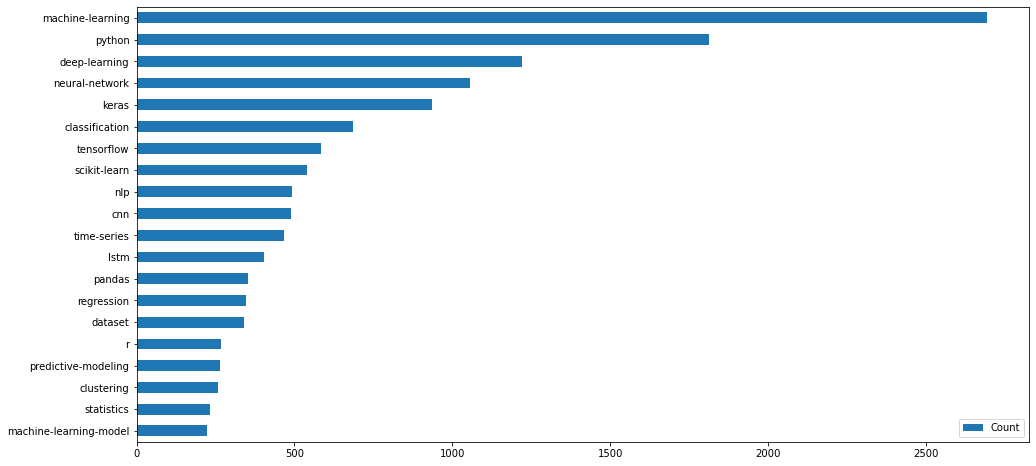

In [10]:
most_used.plot(kind='barh', figsize=(16,8))

Some tags are very, very broad and are unlikely to be useful; e.g.: **python**, **dataset**, **r**. Before we investigate the tags a little deeper, let's repeat the same process for views.

We'll use pandas's [`pandas.DataFrame.iterrows()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows).

<AxesSubplot:>

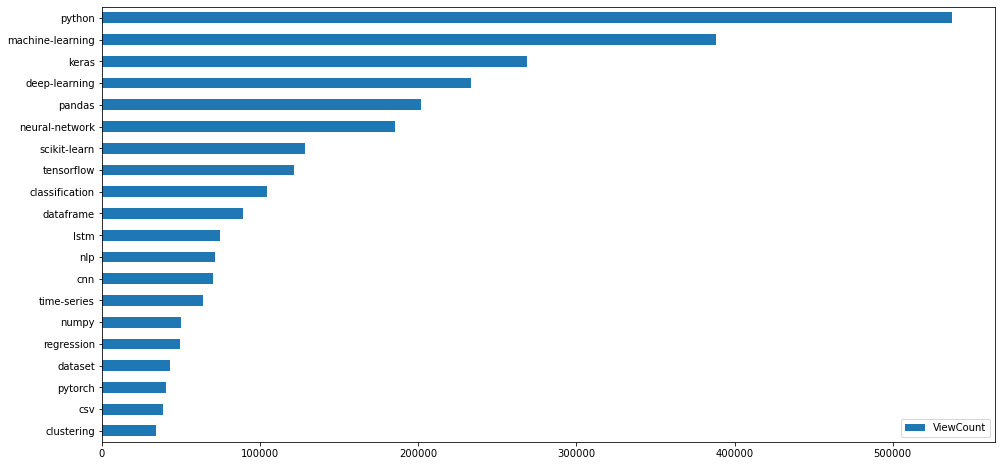

In [11]:
tags_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tags_view_count:
            tags_view_count[tag] += row['ViewCount']
        else:
            tags_view_count[tag] = row['ViewCount']

tags_view_count = pd.DataFrame.from_dict(tags_view_count, orient="index")
tags_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tags_view_count.sort_values('ViewCount').tail(20)
most_viewed.plot(kind = 'barh', figsize = (16,8))

Let's see them side by side.

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

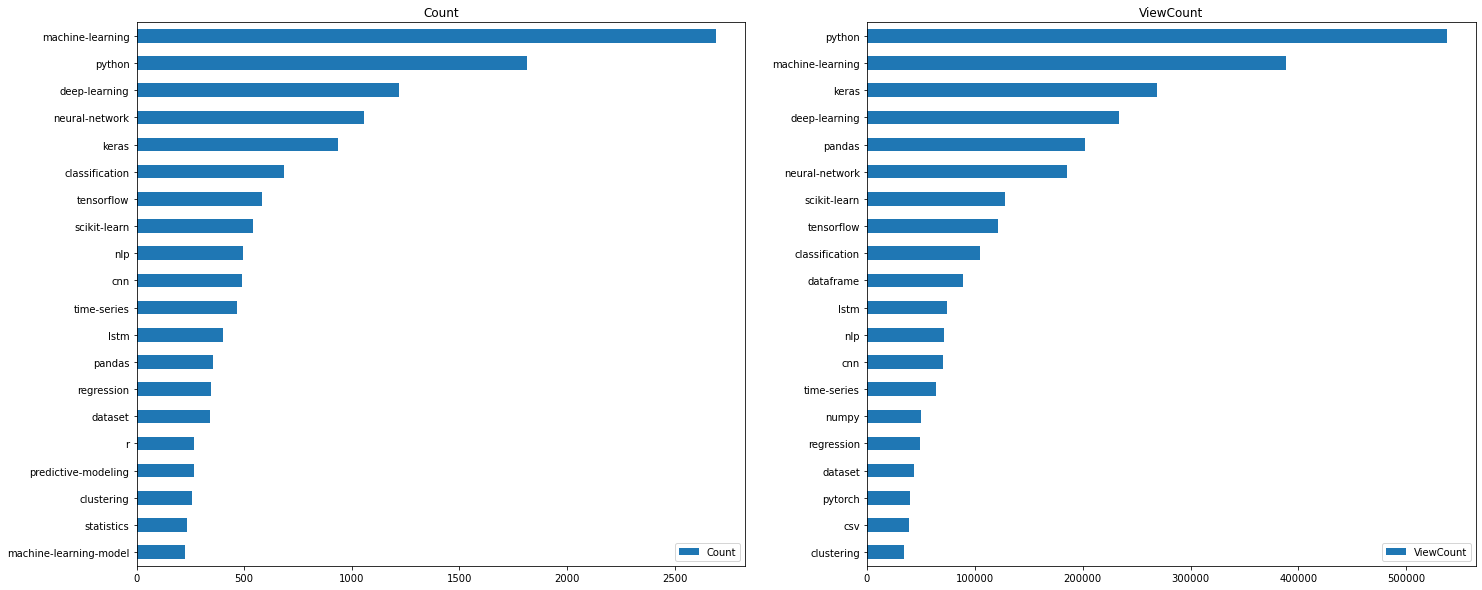

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [13]:
in_used = pd.merge(most_used, most_viewed, how = 'left', left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [14]:
in_viewed = pd.merge(most_used, most_viewed, how = 'right', left_index=True, right_index=True)
in_viewed

,Count,ViewCount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


## Relations Between Tags

[needs to be completed, kernal gets very slow here]

In [15]:
all_tags = list(tags_count.index)
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell us that `time-series` was used together with `r` 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that `machine-learning` was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

<AxesSubplot:>

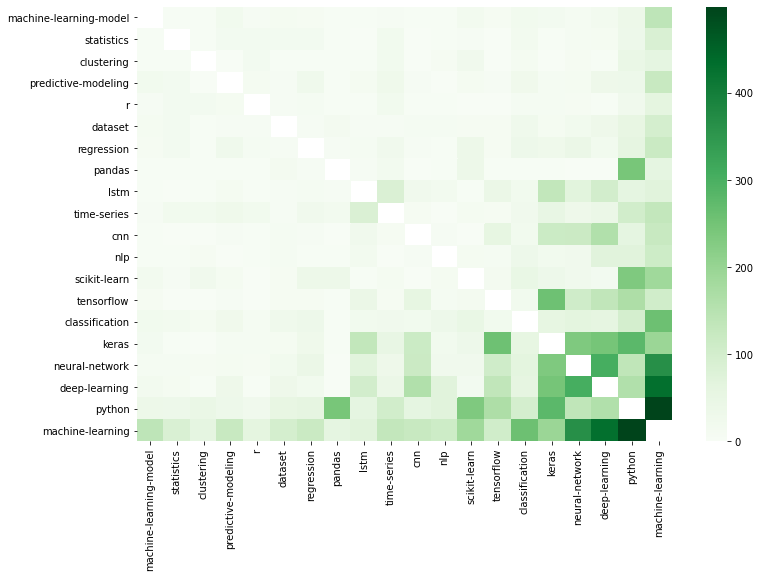

In [16]:
import numpy as np
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN #pd.np.Nan is deprecated
    
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, `dataset` and `scikit-learn` have a "strong" relation to `pandas`, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: [association rules](https://en.wikipedia.org/wiki/Association_rule_learning). Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about [statistical independence](https://en.wikipedia.org/wiki/Independence_(probability_theory)) in the next step).


We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!

## Just a Fad?
Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time. We'll Also clean the `Tags` column.

In [17]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

This list was obtained by looking at all the tags in `most_used` and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns `1` to deep learning questions and `0` otherwise; and we use it.

In [18]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
2509,25601,2017-12-12 15:12:59,"[neural-network, tensorflow, convolution]",1
5245,26742,2018-01-17 11:32:53,"[machine-learning, deep-learning, convolution]",1
4022,57081,2019-08-06 17:30:55,"[deep-learning, image-classification, loss-fun...",1
914,37409,2018-08-24 23:20:49,"[neural-network, loss-function]",1
13200,30619,2018-04-21 16:07:36,"[predictive-modeling, bigdata, rstudio, machin...",0


Looks good!

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates and then create a column that identifies the quarter in which a question was asked.

In [19]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)
all_q.sample(10)

,Id,CreationDate,Tags,DeepLearning,Quarter
5004,5092,2015-02-09 23:22:05,[feature-selection],0,15Q1
5619,17256,2017-02-28 14:03:50,"[feature-selection, hyperparameter, parameter-...",0,17Q1
5995,48047,2019-03-26 17:07:21,"[machine-learning, multiclass-classification]",0,19Q1
13661,62309,2019-10-28 11:10:19,[code],0,19Q4
17457,53894,2019-06-16 10:21:48,"[machine-learning, hardware]",0,19Q2
16005,23372,2017-09-27 17:13:01,"[machine-learning, deep-learning, training, mu...",1,17Q3
14688,62777,2019-11-06 16:26:56,[r],0,19Q4
18692,54666,2019-06-28 08:37:43,"[machine-learning, deep-learning, gan]",1,19Q2
2349,38028,2018-09-10 08:03:35,"[machine-learning, nlp, ai]",0,18Q3
2219,56364,2019-07-25 10:19:48,"[python, pandas, csv]",0,19Q3


For the final stretch of this screen, we'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [20]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
7,16Q1,110,516,0.213178
8,16Q2,109,518,0.210425
9,16Q3,161,585,0.275214


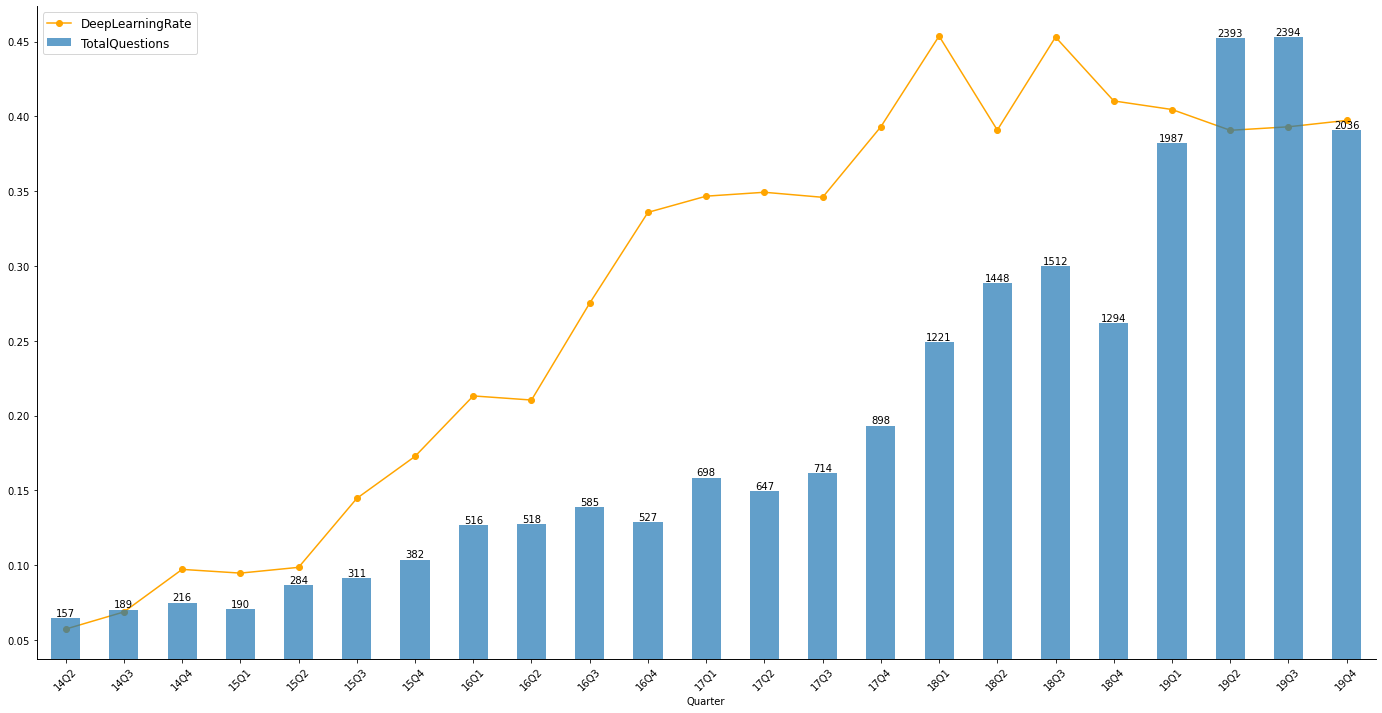

In [21]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.